In [57]:
#importing the library
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [58]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']

In [59]:
data=pd.read_csv('diabetics_pima.csv',names=colnames)

In [60]:
data=data.drop('outcome',axis=1)

In [61]:
data.head()

,preg,glu,bp,sft,ins,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [62]:
data.isnull().sum()

preg    0
glu     0
bp      0
sft     0
ins     0
bmi     0
dpf     0
age     0
dtype: int64

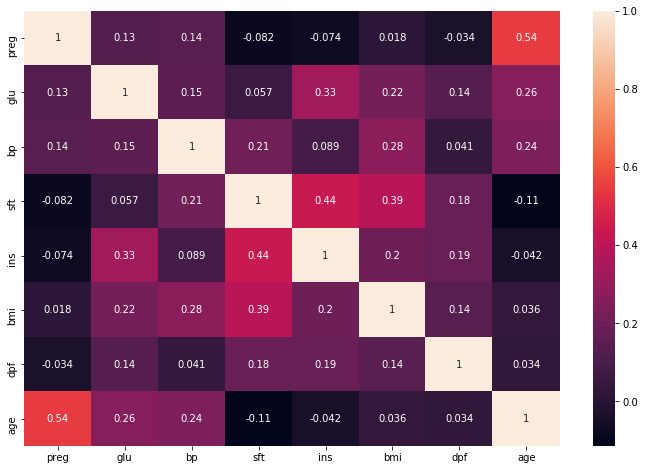

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [64]:
### Elbow method
ks=range(1,8)
inertia=[]

In [65]:
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(data)
    inertia.append(model.inertia_)

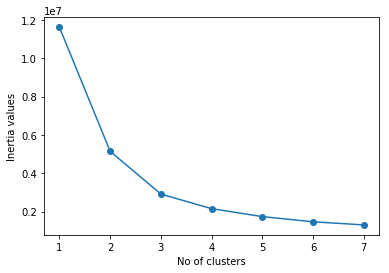

In [66]:
plt.plot(ks,inertia,'-o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

In [67]:
models=KMeans(n_clusters=3,random_state=42)
models.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [68]:
labels=models.predict(data)
#labels

In [69]:
x=data.iloc[:,[5,1]].values

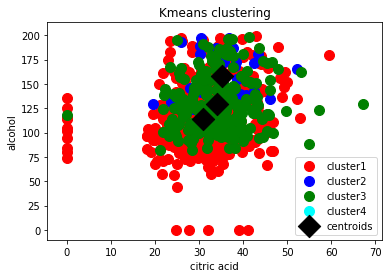

In [70]:
plt.scatter(x[labels==0,0],x[labels==0,1],s=100, c='red',label='cluster1')
plt.scatter(x[labels==1,0],x[labels==1,1],s=100, c='blue',label='cluster2')
plt.scatter(x[labels==2,0],x[labels==2,1],s=100, c='green',label='cluster3')
plt.scatter(x[labels==3,0],x[labels==3,1],s=100, c='cyan',label='cluster4')
plt.scatter(models.cluster_centers_[:,5],models.cluster_centers_[:,1],s=250,c='black',marker='D',label='centroids')
plt.title('Kmeans clustering')
plt.xlabel('citric acid')
plt.ylabel('alcohol')
plt.legend()
plt.show()

In [71]:
#importing the hierarchy
import scipy.cluster.hierarchy as sch

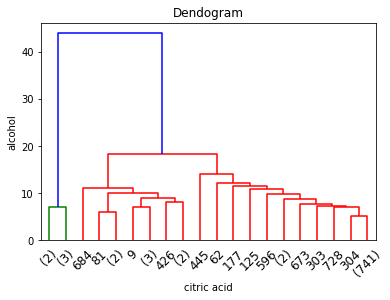

In [89]:
dendrogram=sch.dendrogram(sch.linkage(x,method='single'),orientation='top',truncate_mode='lastp',p=20,leaf_rotation=45)
plt.title('Dendogram')
plt.xlabel('citric acid')
plt.ylabel('alcohol')

plt.show()

In [73]:
model_h=AgglomerativeClustering(n_clusters=4,linkage='ward')

In [74]:
Hc = model_h.fit_predict(x)

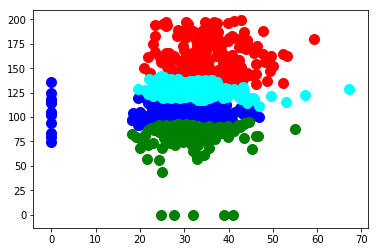

In [75]:
plt.scatter(x[Hc==0,0],x[Hc==0,1],s=100, c='red',label='cluster1')
plt.scatter(x[Hc==1,0],x[Hc==1,1],s=100, c='blue',label='cluster2')
plt.scatter(x[Hc==2,0],x[Hc==2,1],s=100, c='green',label='cluster3')
plt.scatter(x[Hc==3,0],x[Hc==3,1],s=100, c='cyan',label='cluster4')
#plt.scatter(x[Hc==4,0],x[Hc==4,1],s=100, c='magenta',label='cluster5')